In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2


## Hypothesis Education attainment

In [3]:
#2015, 2016, 2017, 2018, 2019
census_dict = {'total_estimate' : 'S1501_C01_006E', 'total_male_25_over' : 'S1501_C03_006E',
                'male_some_college': 'S1501_C04_010E', 'male_associate_degree':'S1501_C04_011E',
                'male_bachelor' : 'S1501_C04_012E' , 'male_graduate_prof' : 'S1501_C04_013E',
                'male_bachelor_higher': 'S1501_C04_015E', 'total_female_25_over' : 'S1501_C05_006E',
                'female_some_college': 'S1501_C06_010E', 'female_associate_degree':'S1501_C06_011E',
                'female_bachelor' : 'S1501_C06_012E', 'female_graduate_prof' : 'S1501_C06_013E',
                'male_bachelor_higher': 'S1501_C06_015E'}

In [5]:
#2010, 2011, 2012, 2013, 2014
census_dict_11 = {'total_estimate' : 'S1501_C01_006E', 'total_male_25_over' : 'S1501_C02_006E',
                'male_some_college': 'S1501_C02_010E', 'male_associate_degree':'S1501_C02_011E',
                'male_bachelor' : 'S1501_C02_012E', 'male_graduate_prof' : 'S1501_C02_013E',
                'male_bachelor_higher': 'S1501_C02_015E', 'total_female_25_over' : 'S1501_C03_006E',
                'female_some_college': 'S1501_C03_010E', 'female_associate_degree':'S1501_C03_011E',
                'female_bachelor' : 'S1501_C03_012E', 'female_graduate_prof' : 'S1501_C03_013E',
                'male_bachelor_higher': 'S1501_C03_015E'}

In [4]:
def load_census(year):
    path = f'/home/aliciescont/Documents/Github/WiD_residency/WiD_Residency_2021_October/DataSources/CensusData/educational_attainment/'
    if year == '2010':
        total_path = path+f'ACSST5Y{year}.csv'
    else:
        total_path = path+f'ACSST1Y{year}.csv'
    data = pd.read_csv(total_path)
    return data

In [6]:
def get_data(c_dict, data, year):
    census_dict = dict()
    census_dict['year'] = year
    for key, col in c_dict.items():
        census_dict[key] = data[col][1]
    
    return census_dict

In [7]:
years = [ '2010','2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
data_census = []
for year in years:
    if year in ['2010','2011', '2012', '2013', '2014']:
        metadata = census_dict_11
    else:
        metadata = census_dict
    data_census.append(get_data(metadata, load_census(str(year)), str(year)) )



In [8]:
df = pd.DataFrame(data_census)
df

,year,total_estimate,total_male_25_over,male_some_college,male_associate_degree,male_bachelor,male_graduate_prof,male_bachelor_higher,total_female_25_over,female_some_college,female_associate_degree,female_bachelor,female_graduate_prof
0,2010,40176,19595,26.1,9.0,17.7,6.4,20.4,20581,29.0,11.1,15.1,5.3
1,2011,42384,20263,27.6,10.5,16.4,14.1,28.0,22121,28.5,8.2,19.0,9.1
2,2012,45087,22443,27.1,9.8,18.1,4.9,23.3,22644,26.6,9.8,17.6,5.7
3,2013,45221,20895,25.2,11.3,17.3,9.7,24.8,24326,29.9,9.6,18.5,6.4
4,2014,45459,20670,29.4,9.4,17.8,7.5,28.2,24789,27.7,13.5,21.3,7.0
5,2015,47979,23376,29.0,8.3,20.3,7.4,26.3,24603,31.2,10.1,20.9,5.4
6,2016,48359,23147,24.4,8.0,19.2,10.7,28.5,25212,26.5,9.6,23.2,5.2
7,2017,50868,24997,27.9,9.1,15.8,6.0,22.0,25871,27.3,8.5,14.5,7.5
8,2018,52066,25087,30.0,7.6,19.9,8.3,26.1,26979,28.1,13.1,17.5,8.6
9,2019,47602,23219,26.7,10.3,21.4,9.0,27.8,24383,26.1,10.1,19.0,8.7


In [9]:
cols = df.columns
print(df.dtypes)
df[cols[1:]] = df[cols[1:]].astype(float)
df.dtypes

year                       object
total_estimate             object
total_male_25_over         object
male_some_college          object
male_associate_degree      object
male_bachelor              object
male_graduate_prof         object
male_bachelor_higher       object
total_female_25_over       object
female_some_college        object
female_associate_degree    object
female_bachelor            object
female_graduate_prof       object
dtype: object


year                        object
total_estimate             float64
total_male_25_over         float64
male_some_college          float64
male_associate_degree      float64
male_bachelor              float64
male_graduate_prof         float64
male_bachelor_higher       float64
total_female_25_over       float64
female_some_college        float64
female_associate_degree    float64
female_bachelor            float64
female_graduate_prof       float64
dtype: object

In [10]:
male_col = df.columns[3:8]
df['total_higher_education_male_percent'] = df[male_col].sum(axis=1)
df['total_higher_education_male_percent']

0    79.6
1    96.6
2    83.2
3    88.3
4    92.3
5    91.3
6    90.8
7    80.8
8    91.9
9    95.2
Name: total_higher_education_male_percent, dtype: float64

In [16]:
female_col = df.columns[9:-1]
df['total_higher_education_female_percent'] = df[female_col].sum(axis=1)
df['total_higher_education_female_percent']

0    140.1
1    161.4
2    142.9
3    152.7
4    161.8
5    158.9
6    155.3
7    138.6
8    159.2
9    159.1
Name: total_higher_education_female_percent, dtype: float64

In [17]:
df_bachelor_sex = df[['year', 'total_estimate', 'total_male_25_over', 'total_higher_education_male_percent', 'total_female_25_over', 'total_higher_education_female_percent']]
df_bachelor_sex

,year,total_estimate,total_male_25_over,total_higher_education_male_percent,total_female_25_over,total_higher_education_female_percent
0,2010,40176.0,19595.0,79.6,20581.0,140.1
1,2011,42384.0,20263.0,96.6,22121.0,161.4
2,2012,45087.0,22443.0,83.2,22644.0,142.9
3,2013,45221.0,20895.0,88.3,24326.0,152.7
4,2014,45459.0,20670.0,92.3,24789.0,161.8
5,2015,47979.0,23376.0,91.3,24603.0,158.9
6,2016,48359.0,23147.0,90.8,25212.0,155.3
7,2017,50868.0,24997.0,80.8,25871.0,138.6
8,2018,52066.0,25087.0,91.9,26979.0,159.2
9,2019,47602.0,23219.0,95.2,24383.0,159.1


In [18]:
df_bachelor_sex['total_higher_male'] = df_bachelor_sex['total_male_25_over']*df_bachelor_sex['total_higher_education_male_percent']/100
df_bachelor_sex['total_higher_female'] = df_bachelor_sex['total_female_25_over']*df_bachelor_sex['total_higher_education_female_percent']/100


/tmp/ipykernel_146900/607829215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bachelor_sex['total_higher_male'] = df_bachelor_sex['total_male_25_over']*df_bachelor_sex['total_higher_education_male_percent']/100
/tmp/ipykernel_146900/607829215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bachelor_sex['total_higher_female'] = df_bachelor_sex['total_female_25_over']*df_bachelor_sex['total_higher_education_female_percent']/100


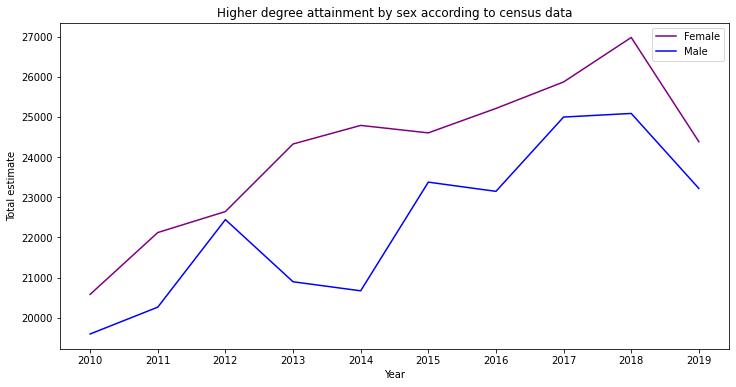

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y= 'total_female_25_over', data = df_bachelor_sex, color = 'purple')
sns.lineplot(x='year', y= 'total_male_25_over', data = df_bachelor_sex, color = 'blue')
plt.title("Higher degree attainment by sex according to census data")
plt.xlabel('Year')
plt.ylabel("Total estimate")
plt.legend(['Female', 'Male'], loc='upper right')

In [20]:
bachelor_increase = []
for i in range(len(df_bachelor_sex)-1):
    bachelor_increase_dict = {'year': df_bachelor_sex['year'][i+1],
                                'male_increase': df_bachelor_sex['total_higher_male'][i+1]-df_bachelor_sex['total_higher_male'][i],
                                'female_increase': df_bachelor_sex['total_higher_female'][i+1]-df_bachelor_sex['total_higher_female'][i]}
    bachelor_increase.append(bachelor_increase_dict)
bachelor_increase_df = pd.DataFrame(bachelor_increase)
bachelor_increase_df

,year,male_increase,female_increase
0,2011,3976.438,6869.313
1,2012,-901.482,-3345.018
2,2013,-222.291,4787.526
3,2014,628.125,2962.800
4,2015,2263.878,-1014.435
5,2016,-324.812,60.069
6,2017,-819.900,-3297.030
7,2018,2857.377,7093.362
8,2019,-950.465,-4157.215


In [21]:
df_bachelor_sex[['total_higher_male', 'total_higher_female']]

,total_higher_male,total_higher_female
0,15597.620,28833.981
1,19574.058,35703.294
2,18672.576,32358.276
3,18450.285,37145.802
4,19078.410,40108.602
5,21342.288,39094.167
6,21017.476,39154.236
7,20197.576,35857.206
8,23054.953,42950.568
9,22104.488,38793.353


In [23]:
stats.ttest_ind(bachelor_increase_df['male_increase'], bachelor_increase_df['female_increase'])


Ttest_indResult(statistic=-0.23874215962593556, pvalue=0.8143365055783734)

We fail to reject the null hypothesis, meaning that the increase in bachelor's for female and male are significantly the same and there is no need to create special programs for women to get a bachelor's degree

In [24]:
stats.ttest_ind(df_bachelor_sex['total_female_25_over'], df_bachelor_sex['total_male_25_over'])


Ttest_indResult(statistic=2.0846058537260177, pvalue=0.05162189669633423)

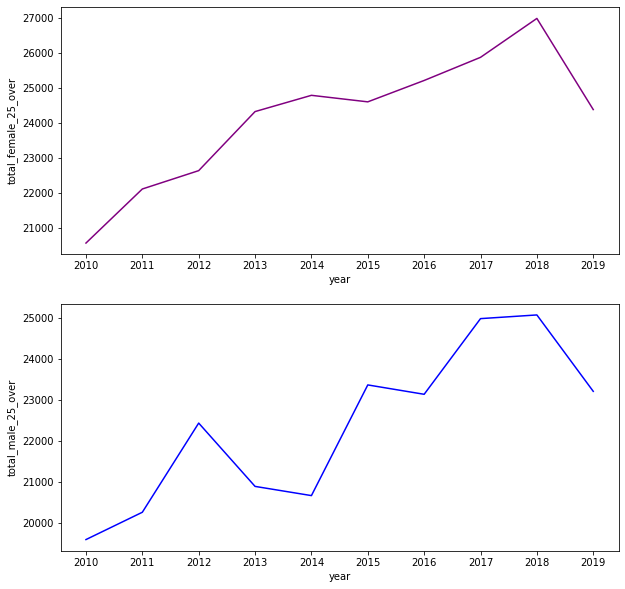

In [25]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10,10))

sns.lineplot(x='year', y= 'total_female_25_over', data = df_bachelor_sex, color = 'purple', ax = axs[0])
sns.lineplot(x='year', y= 'total_male_25_over', data = df_bachelor_sex, color='blue', ax = axs[1])
plt.show()

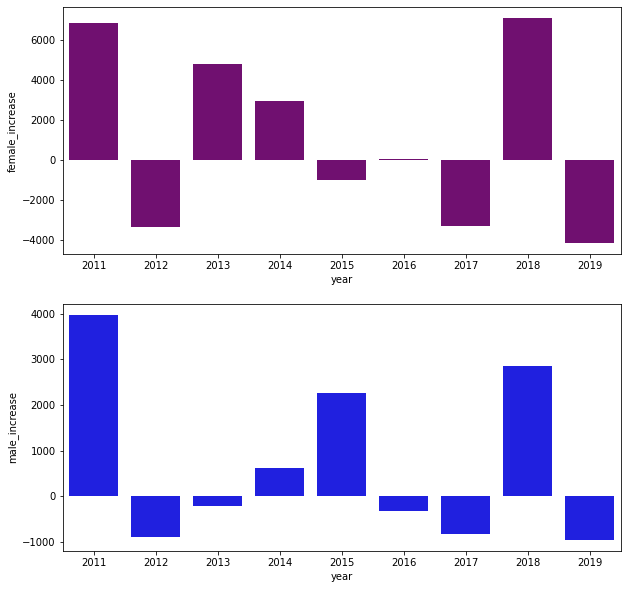

In [26]:

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10,10))

sns.barplot(x='year', y= 'female_increase', data = bachelor_increase_df, color = 'purple', ax = axs[0])
sns.barplot(x='year', y= 'male_increase', data = bachelor_increase_df, color='blue', ax = axs[1])
plt.show()

## Hypothesis education and experience for current job market

In [27]:
linkedin_df = pd.read_csv('/home/aliciescont/Documents/Github/WiD_residency/WiD_Residency_2021_October/Team_1/jobs_linkedin_clean.csv')
linkedin_df.head()

,Unnamed: 0,Unnamed: 0.1,Date,Company,Title,Job Description,Criteria,Seniority,Employment Type,Job Function,Industry,Experience,desc_stem,degree_value,degree_type
0,0,0,2021-11-04,Dignity Health,Patient Advocate,*Overview*\n\nDignity Health Medical Foundatio...,Seniority level\nAssociate\nEmployment type\nF...,Associate,Full-time,Health Care Provider,"Nonprofit Organization Management, Health, Wel...",3.0,"{'three', 'provid', 'choic', 'servic', 'member...",1,bachelors
1,1,1,2021-11-04,Centene Corporation,Disease Management Enrollment Representative,Position Purpose\n\nThe Disease Management Enr...,Seniority level\nNot Applicable\nEmployment ty...,Not Applicable,Full-time,Customer Service and Information Technology,Hospital & Health Care and Insurance,3.0,"{'three', 'provid', 'sexual', 'servic', 'relat...",1,bachelors
2,2,2,2021-10-27,Dignity Health,Patient Logistics Coordinator,"*Overview*\n\nDignity Health, one of the natio...",Seniority level\nEntry level\nEmployment type\...,Entry level,Full-time,Management and Manufacturing,"Nonprofit Organization Management, Health, Wel...",2.0,"{'creativ', 'provid', 'member', 'verbal', 'thi...",1,bachelors
3,3,3,2021-10-20,Centene Corporation,Disease Management Assistant (HNGS),Position Purpose\n\nThe Disease Management Ass...,Seniority level\nNot Applicable\nEmployment ty...,Not Applicable,Contract,Administrative,Hospital & Health Care and Insurance,3.0,"{'analysi', 'three', 'provid', 'sexual', 'serv...",0,high school
4,4,4,2021-10-27,Dignity Health,Patient Logistics Coordinator,"*Overview*\n\nDignity Health, one of the natio...",Seniority level\nEntry level\nEmployment type\...,Entry level,Full-time,Management and Manufacturing,"Nonprofit Organization Management, Health, Wel...",2.0,"{'creativ', 'provid', 'member', 'verbal', 'thi...",1,bachelors


In [28]:
linkedin_senior = linkedin_df[linkedin_df['Seniority'] == 'Mid-Senior level']
linkedin_senior.head()

,Unnamed: 0,Unnamed: 0.1,Date,Company,Title,Job Description,Criteria,Seniority,Employment Type,Job Function,Industry,Experience,desc_stem,degree_value,degree_type
19,19,19,2021-10-26,Magellan Health,"Manager, Customer Care",This position provides administrative oversigh...,Seniority level\nMid-Senior level\nEmployment ...,Mid-Senior level,Full-time,Customer Service and Information Technology,"Information Technology and Services, Financial...",3.0,"{'provid', 'servic', 'member', 'verbal', 'expe...",1,bachelors
43,45,45,2021-10-18,Magellan Health,Customer Care Supervisor,Primary function is to supervise the customer ...,Seniority level\nMid-Senior level\nEmployment ...,Mid-Senior level,Full-time,Customer Service and Information Technology,"Information Technology and Services, Financial...",5.0,"{'provid', 'given', 'servic', 'member', 'relat...",0,high school
70,74,74,2021-10-25,Schnitzer Steel,Contact Center Manager,PICK-n-PULL Auto Dismantlers is a self-service...,Seniority level\nMid-Senior level\nEmployment ...,Mid-Senior level,Full-time,Customer Service and Information Technology,Retail,7.0,"{'analyt', 'weekend', 'style', 'sexual', 'serv...",1,bachelors
88,92,92,2021-10-21,Magellan Health,HR Business Partner,Serves as primary Human Resources (HR) point o...,Seniority level\nMid-Senior level\nEmployment ...,Mid-Senior level,Full-time,Human Resources,"Information Technology and Services, Financial...",9.0,"{'analysi', 'creativ', 'provid', 'strength', '...",1,bachelors
108,113,113,2021-11-02,Schnitzer Steel,Operations Support Manager,Ensure that the store operates both safely and...,Seniority level\nMid-Senior level\nEmployment ...,Mid-Senior level,Full-time,Management and Manufacturing,Retail,5.0,"{'sexual', 'board', 'feet', 'guidelin', 'relat...",1,bachelors


In [29]:
set(linkedin_senior['Experience'].astype(int))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [30]:
linkedin_senior.loc[linkedin_senior['Experience']<3, 'Experience_level'] = 'Junior'
linkedin_senior.loc[(linkedin_senior['Experience']>3) & (linkedin_senior['Experience']<=5), 'Experience_level'] = 'Mid-level'
linkedin_senior.loc[linkedin_senior['Experience']>5 , 'Experience_level'] = 'Senior'


/home/aliciescont/anaconda3/envs/wid/lib/python3.8/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/aliciescont/anaconda3/envs/wid/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [31]:
set(linkedin_senior['Experience_level'])

{'Junior', 'Mid-level', 'Senior', nan, nan, nan}

In [32]:
linkedin_senior[['Experience_level', 'degree_type']].dtypes

Experience_level    object
degree_type         object
dtype: object

In [33]:
contingency_table = pd.crosstab(linkedin_senior['Experience_level'], linkedin_senior['degree_type'], normalize="all")
contingency_table

degree_type,bachelors,high school,not_specified
Experience_level,,,
Junior,0.187500,0.041667,0.041667
Mid-level,0.250000,0.114583,0.072917
Senior,0.177083,0.114583,0.000000


<AxesSubplot:xlabel='degree_type', ylabel='Experience_level'>

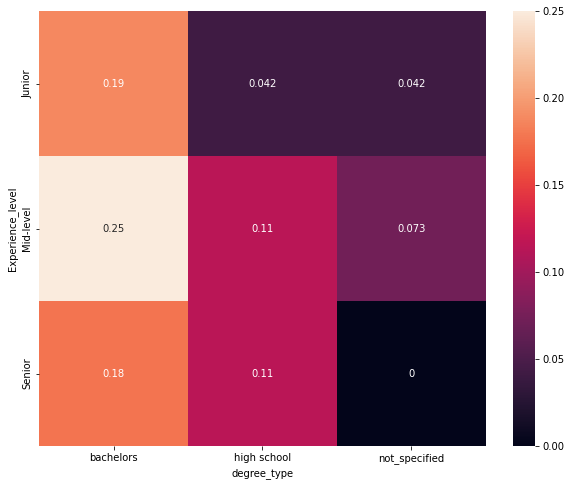

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(contingency_table, annot=True)

In [35]:
stat, p, dof, expected = chi2_contingency(contingency_table)
critical = chi2.ppf(0.95, dof)

alpha = 0.05
if p <=alpha:
    print('Reject H0')
else:
    print('independent')

independent


There is no significant relationship between education degree and experience, meaning that there is a room to get mid-senior role without the need to have both experience and a higher education. Therefore, there

## Skills

In [36]:
#census code to soc codes
soc_codes = pd.read_excel('/home/aliciescont/Documents/Github/WiD_residency/WiD_Residency_2021_October/DataSources/2010-occ-codes-with-crosswalk-from-2002-2011.xls', sheet_name='2010OccCodeList', header=4)
soc_codes = soc_codes.fillna("")
#clean ccupations (lower and removing punctuation)
soc_codes['Unnamed: 0'] = [re.sub(r'[^\w\s]', '', code.lower()) for code in  soc_codes['Unnamed: 0']]
soc_codes['Occupation 2010 Description'] = [re.sub(r'[^\w\s]', '', code.lower()) for code in  soc_codes['Occupation 2010 Description']]
soc_codes.loc[570:585]

,Unnamed: 0,Occupation 2010 Description,2010 Census Code,2010 SOC Code
570,,semiconductor processors,8840,51-9141
571,,adhesive bonding machine operators and tenders,8850,51-9191
572,,cleaning washing and metal pickling equipment ...,8860,51-9192
573,,cooling and freezing equipment operators and t...,8900,51-9193
574,,etchers and engravers,8910,51-9194
575,,molders shapers and casters except metal and p...,8920,51-9195
576,,paper goods machine setters operators and tenders,8930,51-9196
577,,tire builders,8940,51-9197
578,,helpersproduction workers,8950,51-9198
579,,production workers all other,8965,51-9199


In [37]:
#set a label of True if include several broad groups
soc_codes['label'] = soc_codes['2010 SOC Code'].str.contains("[0-9]{2}-[0-9]{4} -", regex=True )
df_soc = soc_codes[(soc_codes['label'] == False)]
df_soc = df_soc[df_soc['2010 Census Code'] != '']
df_soc.tail(20)

,Unnamed: 0,Occupation 2010 Description,2010 Census Code,2010 SOC Code,label
610,,conveyor operators and tenders,9500,53-7011,False
611,,crane and tower operators,9510,53-7021,False
612,,dredge excavating and loading machine operators,9520,53-7030,False
613,,hoist and winch operators,9560,53-7041,False
614,,industrial truck and tractor operators,9600,53-7051,False
615,,cleaners of vehicles and equipment,9610,53-7061,False
616,,laborers and freight stock and material movers...,9620,53-7062,False
617,,machine feeders and offbearers,9630,53-7063,False
618,,packers and packagers hand,9640,53-7064,False
619,,pumping station operators,9650,53-7070,False


In [38]:
#remove info about general groups, SOC Code ##-####-##-#### and leave only ##-####
soc_codes['label'] = soc_codes['2010 SOC Code'].str.contains("[0-9]{2}-[0-9]{4} -", regex=True )
soc_codes[(soc_codes['label'] == True)]

,Unnamed: 0,Occupation 2010 Description,2010 Census Code,2010 SOC Code,label
3,management business science and arts occupations,,0010-3540,11-0000 - 29-0000,True
5,,management business and financial occupations,0010-0950,11-0000 - 13-0000,True
71,,computer engineering and science occupations,1000-1965,15-0000 - 19-0000,True
142,,education legal community service arts and med...,2000-2960,21-0000 - 27-0000,True
235,service occupations,,3600-4650,31-0000 - 39-0000,True
320,sales and office occupations,,4700-5940,41-0000 - 43-0000,True
398,natural resources construction and maintenance...,,6005-7630,45-0000 - 49-0000,True
495,production transportation and material moving ...,,7700-9750,51-0000 - 53-0000,True
583,,transportation occupations,9000-9420,53-1000 - 53-6000,True


In [39]:
occupation_19 = pd.read_csv('/home/aliciescont/Documents/Github/WiD_residency/WiD_Residency_2021_October/DataSources/occupations_by_sex.csv')
occupation_19.tail(10)

,Label (Grouping),"Rancho Cordova city, California!!Total!!Estimate","Rancho Cordova city, California!!Total!!Margin of Error","Rancho Cordova city, California!!Male!!Estimate","Rancho Cordova city, California!!Male!!Margin of Error","Rancho Cordova city, California!!Percent Male!!Estimate","Rancho Cordova city, California!!Percent Male!!Margin of Error","Rancho Cordova city, California!!Female!!Estimate","Rancho Cordova city, California!!Female!!Margin of Error","Rancho Cordova city, California!!Percent Female!!Estimate","Rancho Cordova city, California!!Percent Female!!Margin of Error"
26,Sales and related occupations,2188,±785,1184,±517,54.1%,±13.0,1004,±444,45.9%,±13.0
27,Office and administrative support occu...,3468,±819,1175,±492,33.9%,±11.0,2293,±633,66.1%,±11.0
28,"Natural resources, construction, and maint...",2520,±732,2520,±732,100.0%,±7.4,0,±216,0.0%,±7.4
29,"Farming, fishing, and forestry occupat...",0,±216,0,±216,-,**,0,±216,-,**
30,Construction and extraction occupations,1466,±565,1466,±565,100.0%,±12.3,0,±216,0.0%,±12.3
31,"Installation, maintenance, and repair ...",1054,±537,1054,±537,100.0%,±16.6,0,±216,0.0%,±16.6
32,"Production, transportation, and material m...",3381,±784,2929,±754,86.6%,±10.8,452,±385,13.4%,±10.8
33,Production occupations,1490,±519,1183,±482,79.4%,±20.1,307,±329,20.6%,±20.1
34,Transportation occupations,1295,±654,1295,±654,100.0%,±13.8,0,±216,0.0%,±13.8
35,Material moving occupations,596,±316,451,±268,75.7%,±27.4,145,±188,24.3%,±27.4


In [40]:
#clean occupation and filter columns to Total Estimate for Male, Female and total
occupation_19['occupations_nor'] = [occupation.replace(u'\xa0', u'').lower() for occupation in occupation_19['Label (Grouping)']]
occupation_19['occupations_nor'] = [re.sub(r'[^\w\s]', '', occupation) for occupation in  occupation_19['occupations_nor']]
occupation_19 = occupation_19[['occupations_nor', 'Rancho Cordova city, California!!Total!!Estimate', 'Rancho Cordova city, California!!Male!!Estimate', 'Rancho Cordova city, California!!Female!!Estimate']]
occupation_19 = occupation_19.rename(columns={'Rancho Cordova city, California!!Total!!Estimate': 'Total',
                                                'Rancho Cordova city, California!!Male!!Estimate':'Male', 
                                                'Rancho Cordova city, California!!Female!!Estimate': 'Female'})
occupation_19.tail(10)

,occupations_nor,Total,Male,Female
26,sales and related occupations,2188,1184,1004
27,office and administrative support occupations,3468,1175,2293
28,natural resources construction and maintenance...,2520,2520,0
29,farming fishing and forestry occupations,0,0,0
30,construction and extraction occupations,1466,1466,0
31,installation maintenance and repair occupations,1054,1054,0
32,production transportation and material moving ...,3381,2929,452
33,production occupations,1490,1183,307
34,transportation occupations,1295,1295,0
35,material moving occupations,596,451,145


In [41]:
#add SOC code for each occupation
occupation_19_code = occupation_19.merge(df_soc, how='left', right_on='Occupation 2010 Description', left_on='occupations_nor')
occupation_19_code = occupation_19_code[['occupations_nor', 'Total', 'Male', 'Female', '2010 SOC Code']]
occupation_19_code.head()

,occupations_nor,Total,Male,Female,2010 SOC Code
0,fulltime yearround civilian employed populatio...,24705,14342,10363,NaN
1,management business science and arts occupations,9550,4511,5039,NaN
2,management business and financial occupations,3268,1434,1834,NaN
3,management occupations,2036,1107,929,11-0000
4,business and financial operations occupations,1232,327,905,13-0000


In [42]:
#input an occupation that didn't match due to its assigned code is 53-1000 - 53-6000
occupation_19_code.loc[occupation_19_code['occupations_nor'] == 'transportation occupations', '2010 SOC Code'] = '53-0000'
occupation_19_code.dropna(inplace=True)
occupation_19_code['Major_group'] = [re.search(r"^[0-9]{2}", str(code))[0] for code in occupation_19_code['2010 SOC Code']]
occupation_19_code

,occupations_nor,Total,Male,Female,2010 SOC Code,Major_group
3,management occupations,2036,1107,929,11-0000,11
4,business and financial operations occupations,1232,327,905,13-0000,13
6,computer and mathematical occupations,1649,1136,513,15-0000,15
7,architecture and engineering occupations,649,512,137,17-0000,17
8,life physical and social science occupations,578,433,145,19-0000,19
10,community and social service occupations,616,148,468,21-0000,21
11,legal occupations,351,180,171,23-0000,23
13,arts design entertainment sports and media occ...,299,172,127,27-0000,27
14,healthcare practitioners and technical occupat...,1899,449,1450,29-0000,29
18,healthcare support occupations,627,154,473,31-0000,31


In [45]:
#load data from O*NET with skills by occupation
skills_df = pd.read_excel('/home/aliciescont/Documents/Github/WiD_residency/WiD_Residency_2021_October/DataSources/Skills.xlsx', sheet_name='Skills')
skills_df = skills_df[skills_df['Scale Name'] == 'Importance']
skills_df = skills_df[['O*NET-SOC Code', 'Title', 'Element ID']]

In [46]:
skills_df.shape

(30555, 3)

In [47]:
#extract patterns of SOC codes to match with broad group with census occupation
skills_df['Major_group'] = [re.search(r"^[0-9]{2}", str(code))[0] for code in skills_df['O*NET-SOC Code']]
skills_df['SOC_group'] = [re.search(r"[0-9]{4}", str(code))[0] for code in skills_df['O*NET-SOC Code']]
skills_df['Minor_group'] = [code[0] for code in skills_df['SOC_group']]
skills_df['broad_occupation'] = [code[1:3] for code in skills_df['SOC_group']]
skills_df['detailed_occupation'] = [ code[3:] for code in skills_df['SOC_group']] 
skills_df

,O*NET-SOC Code,Title,Element ID,Major_group,SOC_group,Minor_group,broad_occupation,detailed_occupation
0,11-1011.00,Chief Executives,2.A.1.a,11,1011,1,01,1
2,11-1011.00,Chief Executives,2.A.1.b,11,1011,1,01,1
4,11-1011.00,Chief Executives,2.A.1.c,11,1011,1,01,1
6,11-1011.00,Chief Executives,2.A.1.d,11,1011,1,01,1
8,11-1011.00,Chief Executives,2.A.1.e,11,1011,1,01,1
...,...,...,...,...,...,...,...,...
61100,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.4.h,53,7121,7,12,1
61102,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.a,53,7121,7,12,1
61104,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.b,53,7121,7,12,1
61106,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.5.c,53,7121,7,12,1


In [48]:
#filter skills by broad group based on reference of content model reference (O*NET)
skills_df['Element_ID_group'] = [re.sub(r".[a-z]", '', element) for element in skills_df['Element ID']]
skills_df.head()

,O*NET-SOC Code,Title,Element ID,Major_group,SOC_group,Minor_group,broad_occupation,detailed_occupation,Element_ID_group
0,11-1011.00,Chief Executives,2.A.1.a,11,1011,1,01,1,2.A.1
2,11-1011.00,Chief Executives,2.A.1.b,11,1011,1,01,1,2.A.1
4,11-1011.00,Chief Executives,2.A.1.c,11,1011,1,01,1,2.A.1
6,11-1011.00,Chief Executives,2.A.1.d,11,1011,1,01,1,2.A.1
8,11-1011.00,Chief Executives,2.A.1.e,11,1011,1,01,1,2.A.1


In [49]:
group_skills = skills_df[['Element_ID_group', 'Major_group']].groupby(['Major_group'])
group_skills.count()

#get total groups from SOC Major group
group_dict = dict()
for key in group_skills.groups.keys():
    group_dict[key] = group_skills.get_group(key).count()[0]

group_dict

{'11': 1750,
 '13': 1505,
 '15': 1015,
 '17': 1925,
 '19': 1995,
 '21': 490,
 '23': 245,
 '25': 1995,
 '27': 1330,
 '29': 2730,
 '31': 665,
 '33': 840,
 '35': 560,
 '37': 280,
 '39': 1015,
 '41': 735,
 '43': 1785,
 '45': 420,
 '47': 2135,
 '49': 1750,
 '51': 3745,
 '53': 1645}

In [50]:
group_count = skills_df[['Major_group', 'Element_ID_group','SOC_group' ]].groupby(['Major_group', 'Element_ID_group'])
group_count.count()

SOC_group
Major_group Element_ID_group           
11          2.A.1                   300
            2.A.2                   200
            2.B.1                   300
            2.B.2                    50
            2.B.3                   550
...                                 ...
53          2.B.1                   282
            2.B.2                    47
            2.B.3                   517
            2.B.4                   141
            2.B.5                   188

[154 rows x 1 columns]

In [51]:
tuple_list = []
for key in group_skills.groups.keys():
    for activity in set(skills_df['Element_ID_group']):
       tuple_list.append((key, activity))

element_dict = dict()
for key in tuple_list:
    total = group_dict[key[0]]
    #print(group_count.get_group(key).count()[0])
    element_dict[key] = group_count.get_group(key).count()[0]

In [52]:
element_dict

{('11', '2.B.2'): 50,
 ('11', '2.B.1'): 300,
 ('11', '2.B.3'): 550,
 ('11', '2.A.1'): 300,
 ('11', '2.B.5'): 200,
 ('11', '2.A.2'): 200,
 ('11', '2.B.4'): 150,
 ('13', '2.B.2'): 43,
 ('13', '2.B.1'): 258,
 ('13', '2.B.3'): 473,
 ('13', '2.A.1'): 258,
 ('13', '2.B.5'): 172,
 ('13', '2.A.2'): 172,
 ('13', '2.B.4'): 129,
 ('15', '2.B.2'): 29,
 ('15', '2.B.1'): 174,
 ('15', '2.B.3'): 319,
 ('15', '2.A.1'): 174,
 ('15', '2.B.5'): 116,
 ('15', '2.A.2'): 116,
 ('15', '2.B.4'): 87,
 ('17', '2.B.2'): 55,
 ('17', '2.B.1'): 330,
 ('17', '2.B.3'): 605,
 ('17', '2.A.1'): 330,
 ('17', '2.B.5'): 220,
 ('17', '2.A.2'): 220,
 ('17', '2.B.4'): 165,
 ('19', '2.B.2'): 57,
 ('19', '2.B.1'): 342,
 ('19', '2.B.3'): 627,
 ('19', '2.A.1'): 342,
 ('19', '2.B.5'): 228,
 ('19', '2.A.2'): 228,
 ('19', '2.B.4'): 171,
 ('21', '2.B.2'): 14,
 ('21', '2.B.1'): 84,
 ('21', '2.B.3'): 154,
 ('21', '2.A.1'): 84,
 ('21', '2.B.5'): 56,
 ('21', '2.A.2'): 56,
 ('21', '2.B.4'): 42,
 ('23', '2.B.2'): 7,
 ('23', '2.B.1'): 42,
 ('

In [53]:
dict_merge = dict()
dict_to_df = []
for el, val in element_dict.items():
    dict_merge = {'group': el[0], 
                'skill_id':el[1], 
                'count' : val ,
                'total' : group_dict[el[0]]}
    dict_to_df.append(dict_merge)
    

In [54]:
conversion_df = pd.DataFrame(dict_to_df)


tech_occupation = conversion_df[conversion_df['skill_id'] =='2.B.3' ]
tech_occupation['technical_skill_ratio'] = tech_occupation['count']/tech_occupation['total']
tech_occupation.head(20)

/tmp/ipykernel_146900/3826750674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_occupation['technical_skill_ratio'] = tech_occupation['count']/tech_occupation['total']


,group,skill_id,count,total,technical_skill_ratio
2,11,2.B.3,550,1750,0.314286
9,13,2.B.3,473,1505,0.314286
16,15,2.B.3,319,1015,0.314286
23,17,2.B.3,605,1925,0.314286
30,19,2.B.3,627,1995,0.314286
37,21,2.B.3,154,490,0.314286
44,23,2.B.3,77,245,0.314286
51,25,2.B.3,627,1995,0.314286
58,27,2.B.3,418,1330,0.314286
65,29,2.B.3,858,2730,0.314286


In [55]:
#remove duplicates based on broad group and broad skill group
skills_df = skills_df.drop_duplicates(['Element_ID_group', 'O*NET-SOC Code'])
skills_df[skills_df['Title'] == 'Chief Executives']
skills_df

,O*NET-SOC Code,Title,Element ID,Major_group,SOC_group,Minor_group,broad_occupation,detailed_occupation,Element_ID_group
0,11-1011.00,Chief Executives,2.A.1.a,11,1011,1,01,1,2.A.1
12,11-1011.00,Chief Executives,2.A.2.a,11,1011,1,01,1,2.A.2
20,11-1011.00,Chief Executives,2.B.1.a,11,1011,1,01,1,2.B.1
32,11-1011.00,Chief Executives,2.B.2.i,11,1011,1,01,1,2.B.2
34,11-1011.00,Chief Executives,2.B.3.a,11,1011,1,01,1,2.B.3
...,...,...,...,...,...,...,...,...,...
61060,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.1.a,53,7121,7,12,1,2.B.1
61072,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.2.i,53,7121,7,12,1,2.B.2
61074,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.3.a,53,7121,7,12,1,2.B.3
61096,53-7121.00,"Tank Car, Truck, and Ship Loaders",2.B.4.e,53,7121,7,12,1,2.B.4


In [56]:
#merge census data for occupation by sex with skills group
occupation_19_skills = occupation_19_code.merge(skills_df, how='inner', on="Major_group")
occupation_19_skills[occupation_19_skills['occupations_nor'] == 'management occupations']
occupation_19_skills = occupation_19_skills.drop_duplicates(['Major_group', 'Element_ID_group'])
occupation_19_skills.to_csv('skill_occupation.csv')

In [57]:
occupation_19_skills

,occupations_nor,Total,Male,Female,2010 SOC Code,Major_group,O*NET-SOC Code,Title,Element ID,SOC_group,Minor_group,broad_occupation,detailed_occupation,Element_ID_group
0,management occupations,2036,1107,929,11-0000,11,11-1011.00,Chief Executives,2.A.1.a,1011,1,01,1,2.A.1
1,management occupations,2036,1107,929,11-0000,11,11-1011.00,Chief Executives,2.A.2.a,1011,1,01,1,2.A.2
2,management occupations,2036,1107,929,11-0000,11,11-1011.00,Chief Executives,2.B.1.a,1011,1,01,1,2.B.1
3,management occupations,2036,1107,929,11-0000,11,11-1011.00,Chief Executives,2.B.2.i,1011,1,01,1,2.B.2
4,management occupations,2036,1107,929,11-0000,11,11-1011.00,Chief Executives,2.B.3.a,1011,1,01,1,2.B.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385,transportation occupations,1295,1295,0,53-0000,53,53-1041.00,Aircraft Cargo Handling Supervisors,2.B.1.a,1041,1,04,1,2.B.1
5386,transportation occupations,1295,1295,0,53-0000,53,53-1041.00,Aircraft Cargo Handling Supervisors,2.B.2.i,1041,1,04,1,2.B.2
5387,transportation occupations,1295,1295,0,53-0000,53,53-1041.00,Aircraft Cargo Handling Supervisors,2.B.3.a,1041,1,04,1,2.B.3
5388,transportation occupations,1295,1295,0,53-0000,53,53-1041.00,Aircraft Cargo Handling Supervisors,2.B.4.e,1041,1,04,1,2.B.4


Census data showed information of broader groups that seems to have the same ratio of skills among them